# Virtual box 설치

- [Virtualbox download](https://www.virtualbox.org/wiki/Downloads)

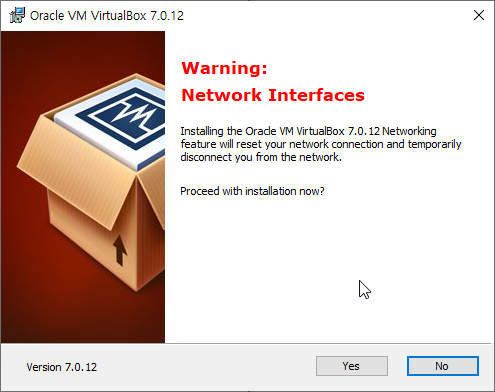


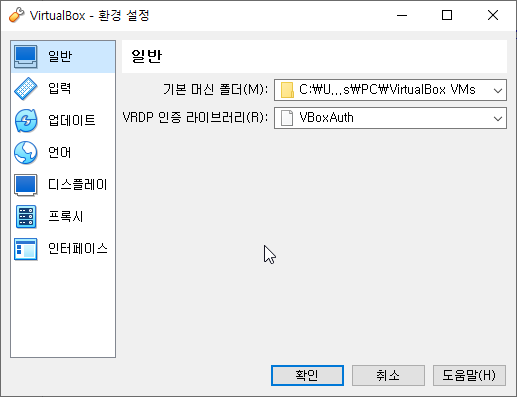

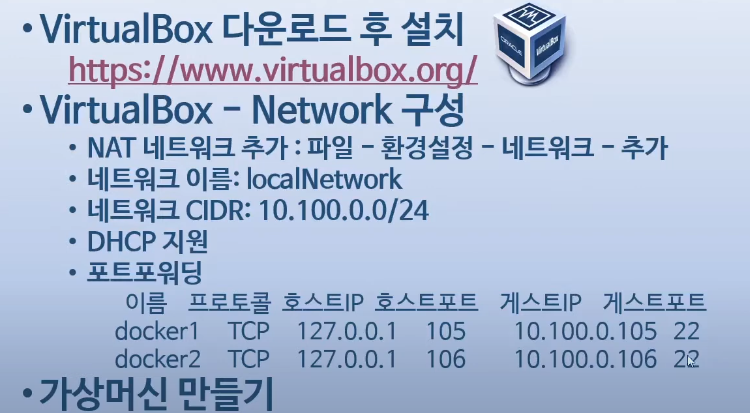

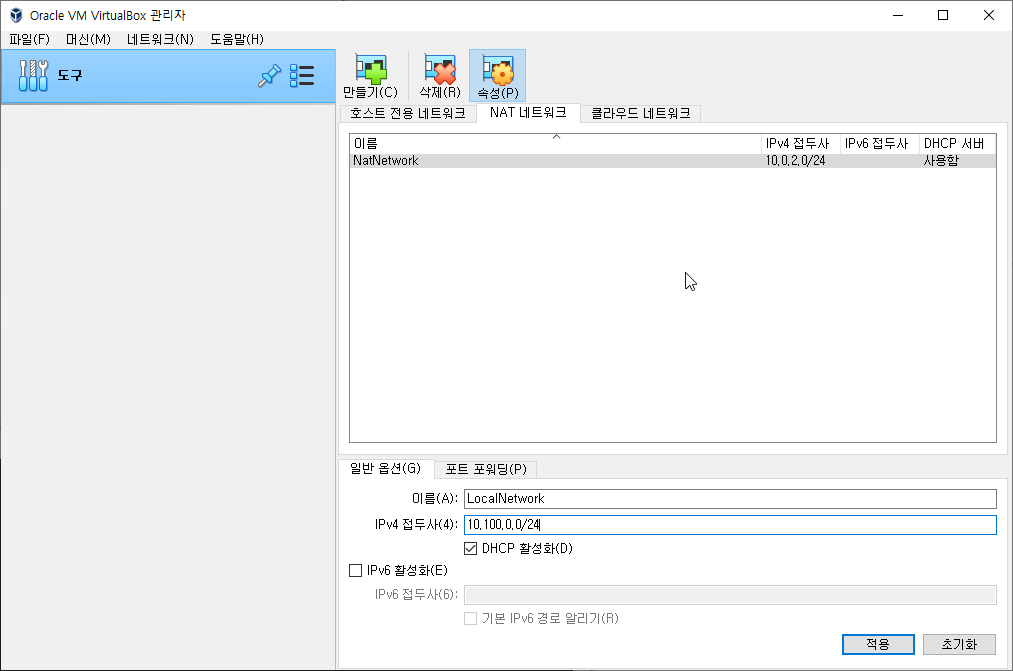
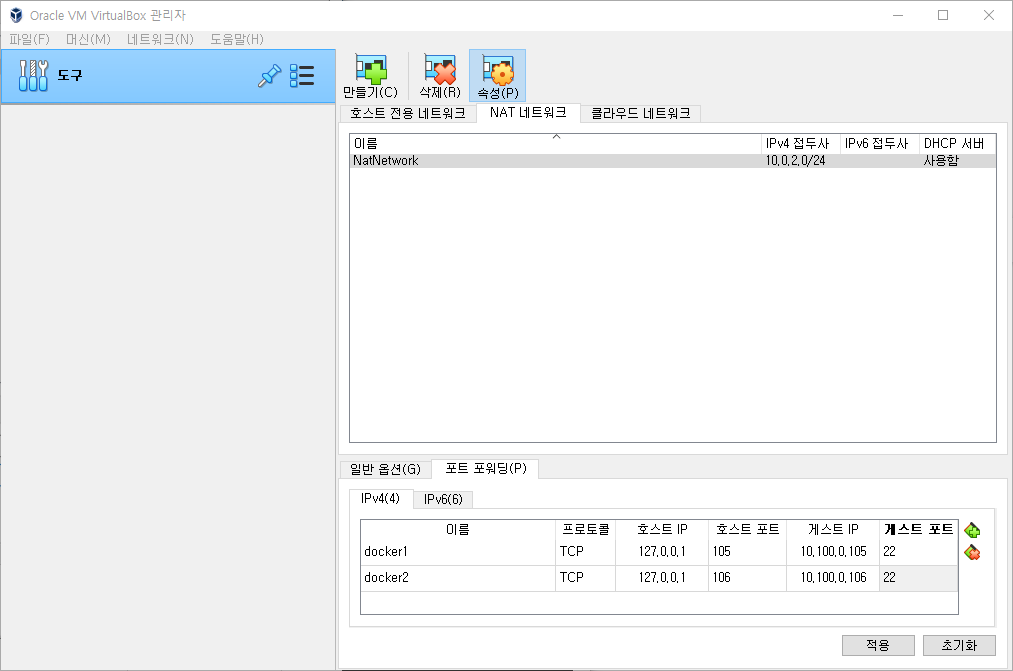
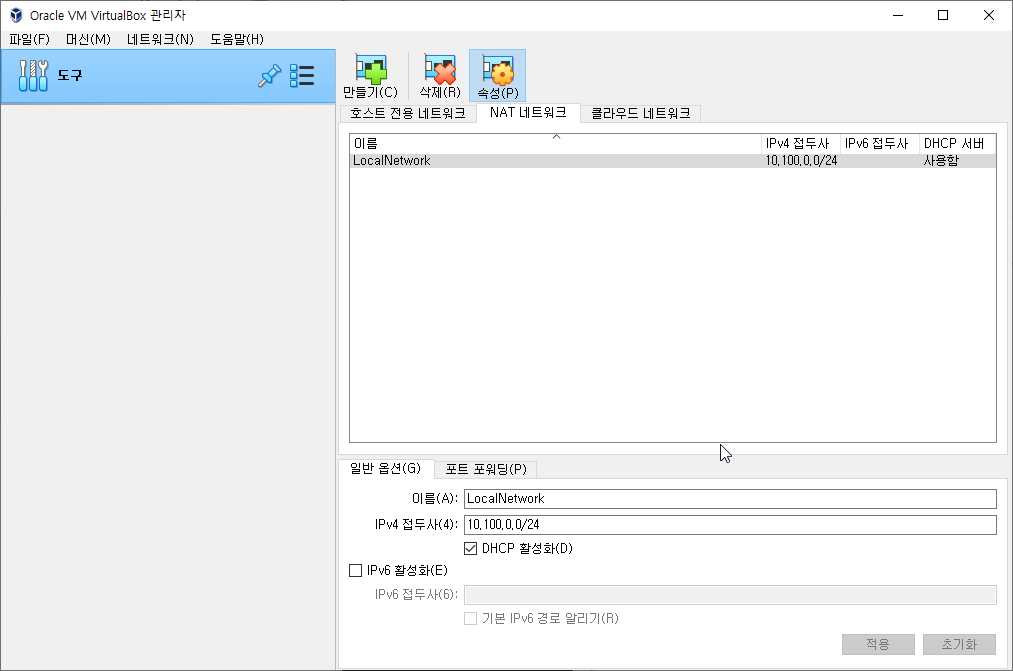

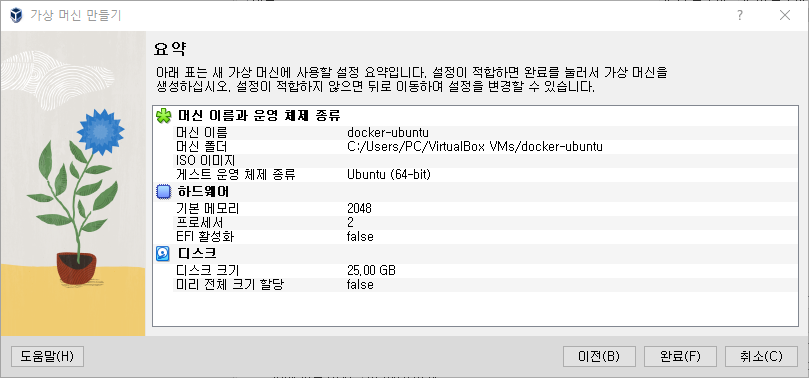

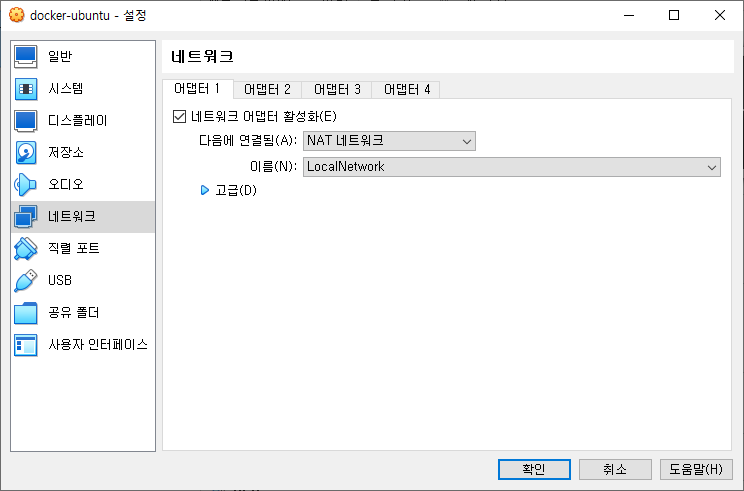

# ubuntu 설치
> [우분투 데스크탑 버전](https://ubuntu.com/download/desktop)
> 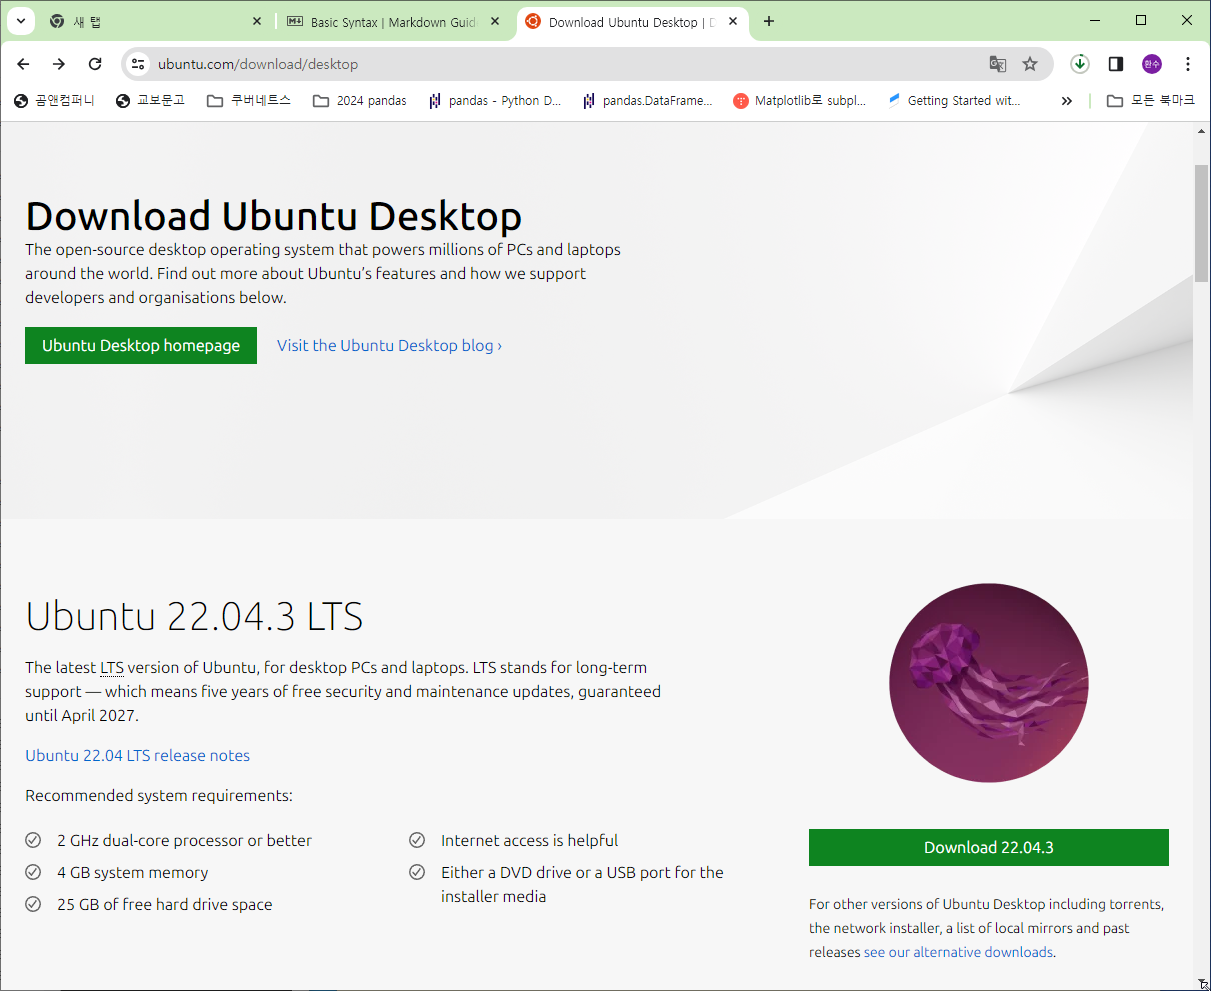
> 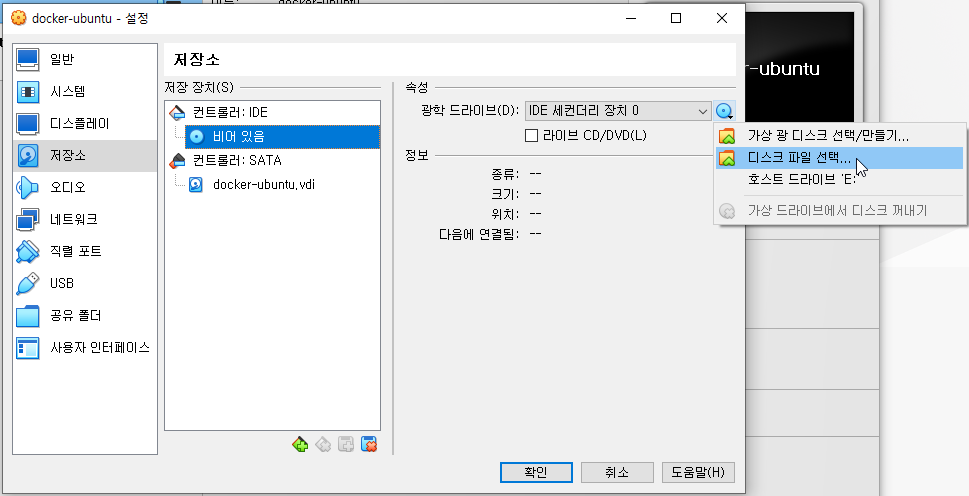
> 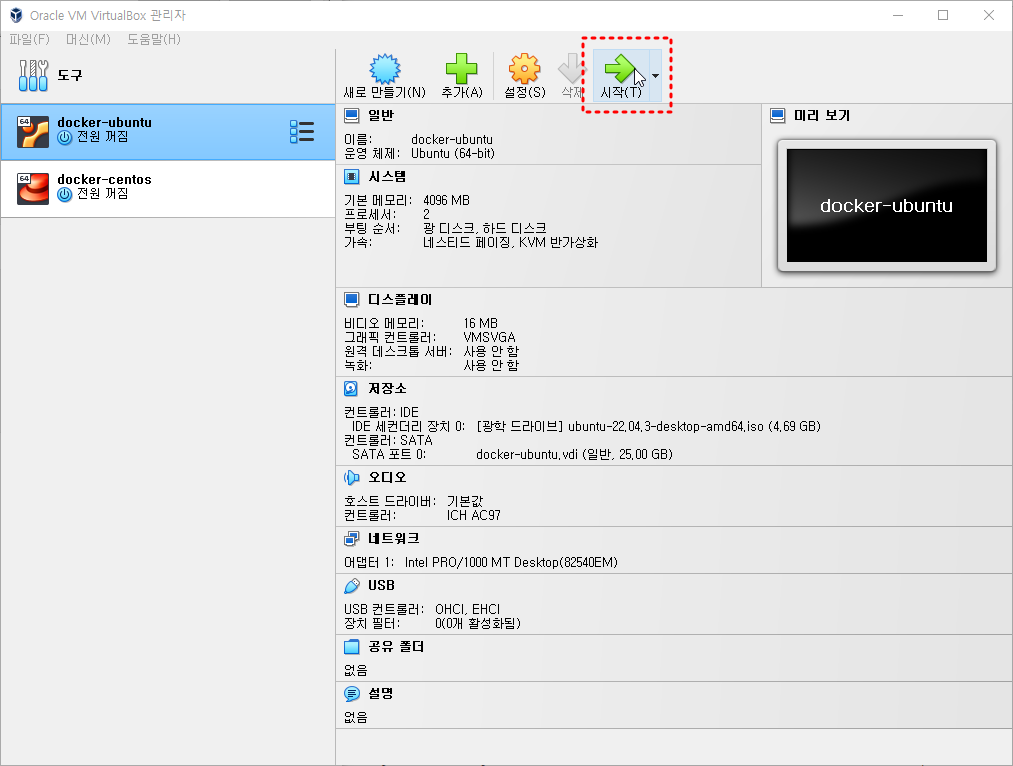
> 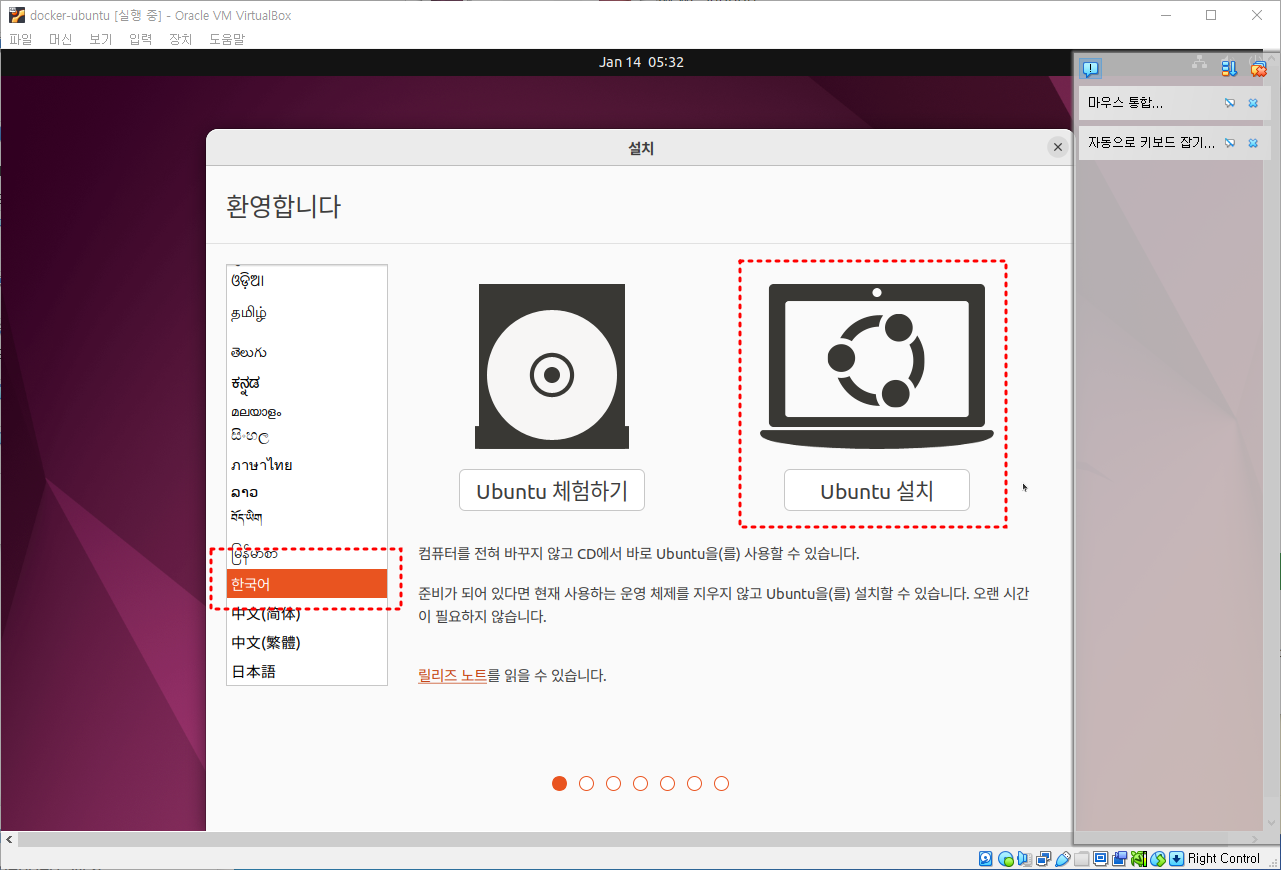

``` 
$ cd ..
$ ip addr 
$ hostname 
$ sudo vi /etc/hostname  # 복제 후도 실행
$ sudo vi /etc/hosts # 복제 후도 실행, 확인
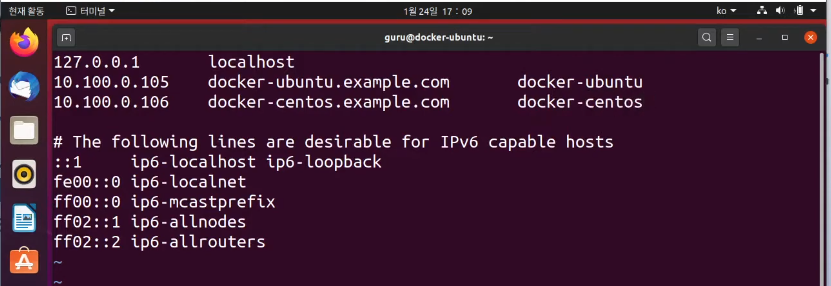
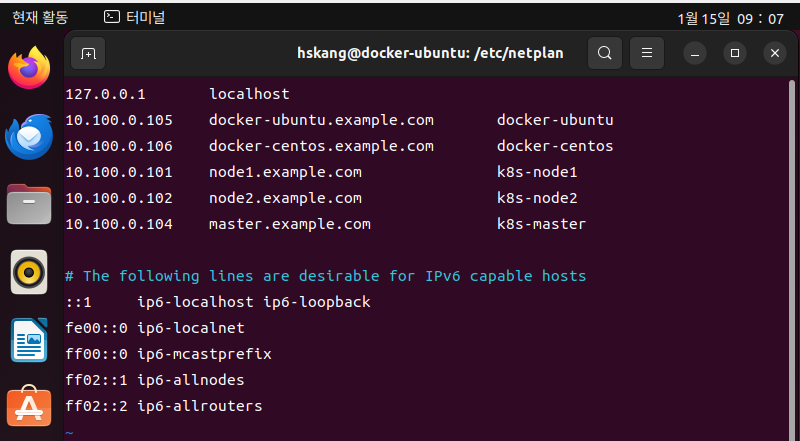

$ ping -c 3 8.8.8.8 # 복제 후도 실행, 확인 
$ sudo passwd root # root 암호 설정인데 복제하며 암호는 이전 암호와 동일하므로 필요 없음
$ su - root # 복제 후도 실행, 확인 차원에서 ...

$# systemctl set-default multi-user.target # 텍스트 모드로 부팅, 이건 필요 없음
나중에 연습 아래로...

$# systemctl set-default graphical.target # 그래픽 모드로 부팅

$# apt-get uppdate # 복사 후에도 해야 함
$# apt-get install -y openssh-server curl vim tree # 복제에서 이건 안해도 됨
$# systemctl status sshd # 확인 차원


$# ssh hskang@localhost

yes 


암호입력

``` 

$ sudo reboot 

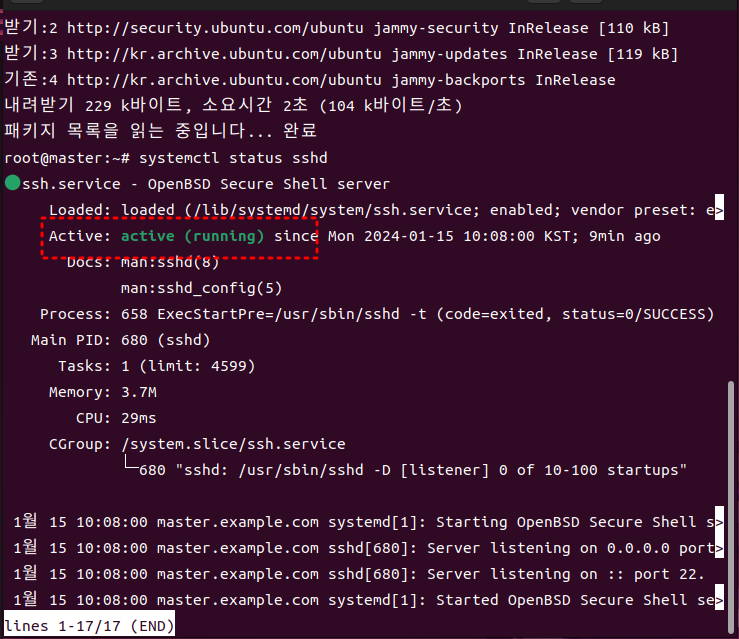


- sshd에 접속 
- 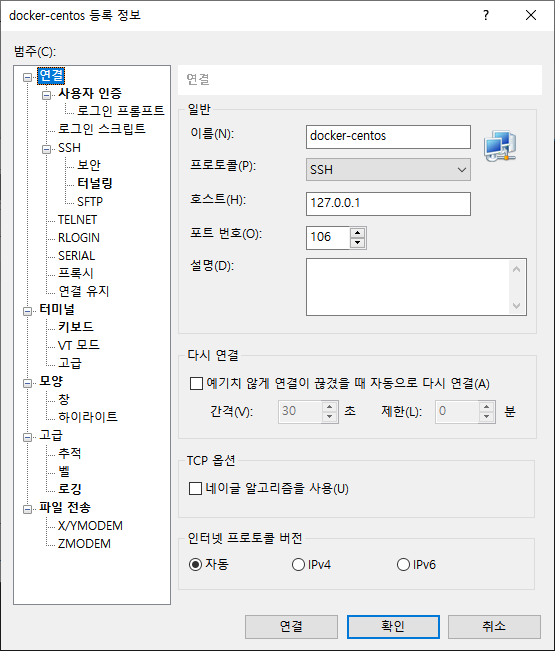
- 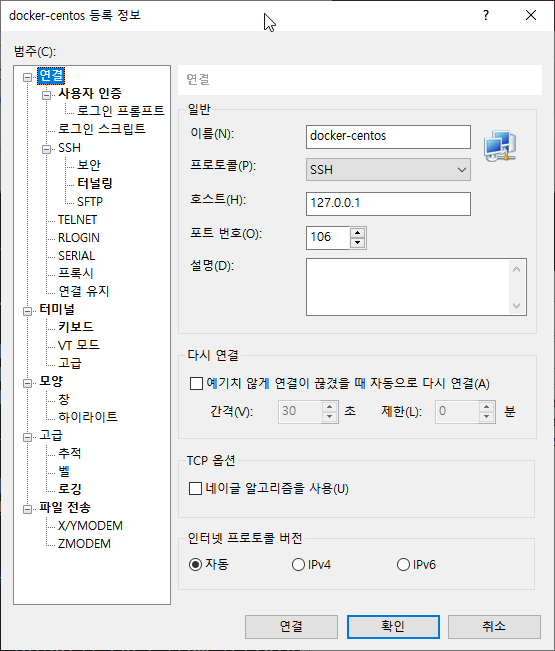



- 우분투에서 ip 설정 방법


#  가상 머신 복제 방법

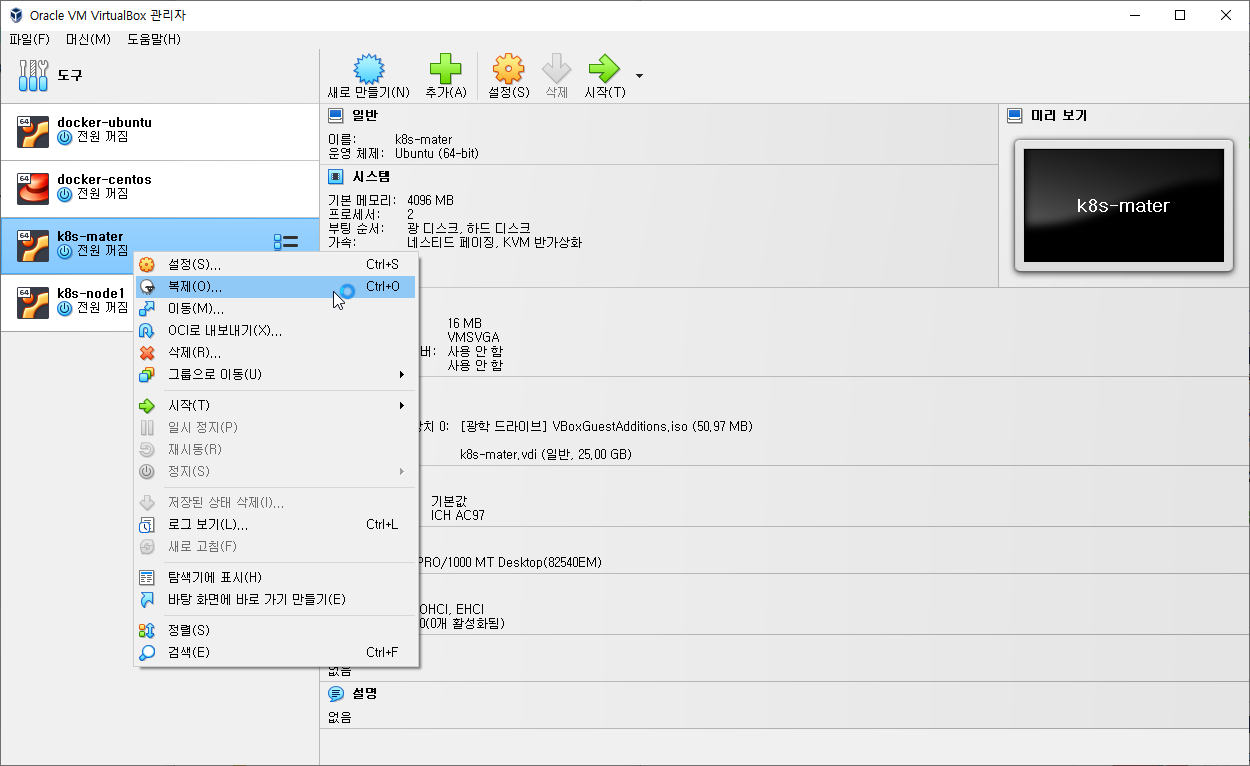
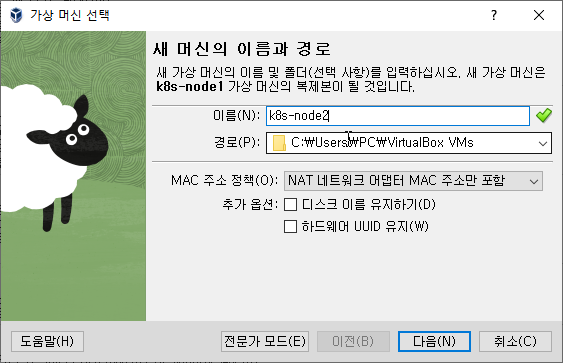
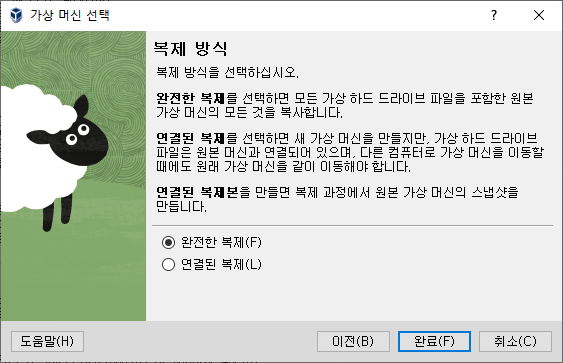

- 시작 버튼 클릭으로 부팅
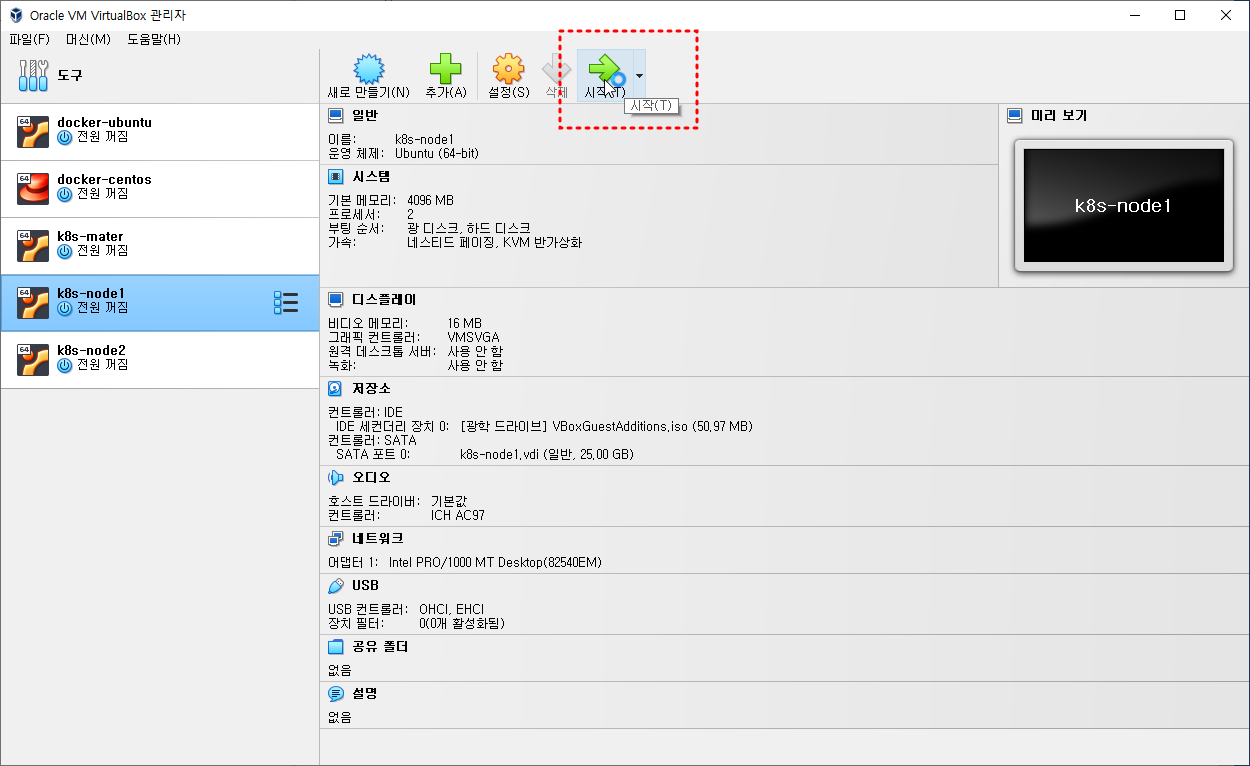

- ip 설정, 
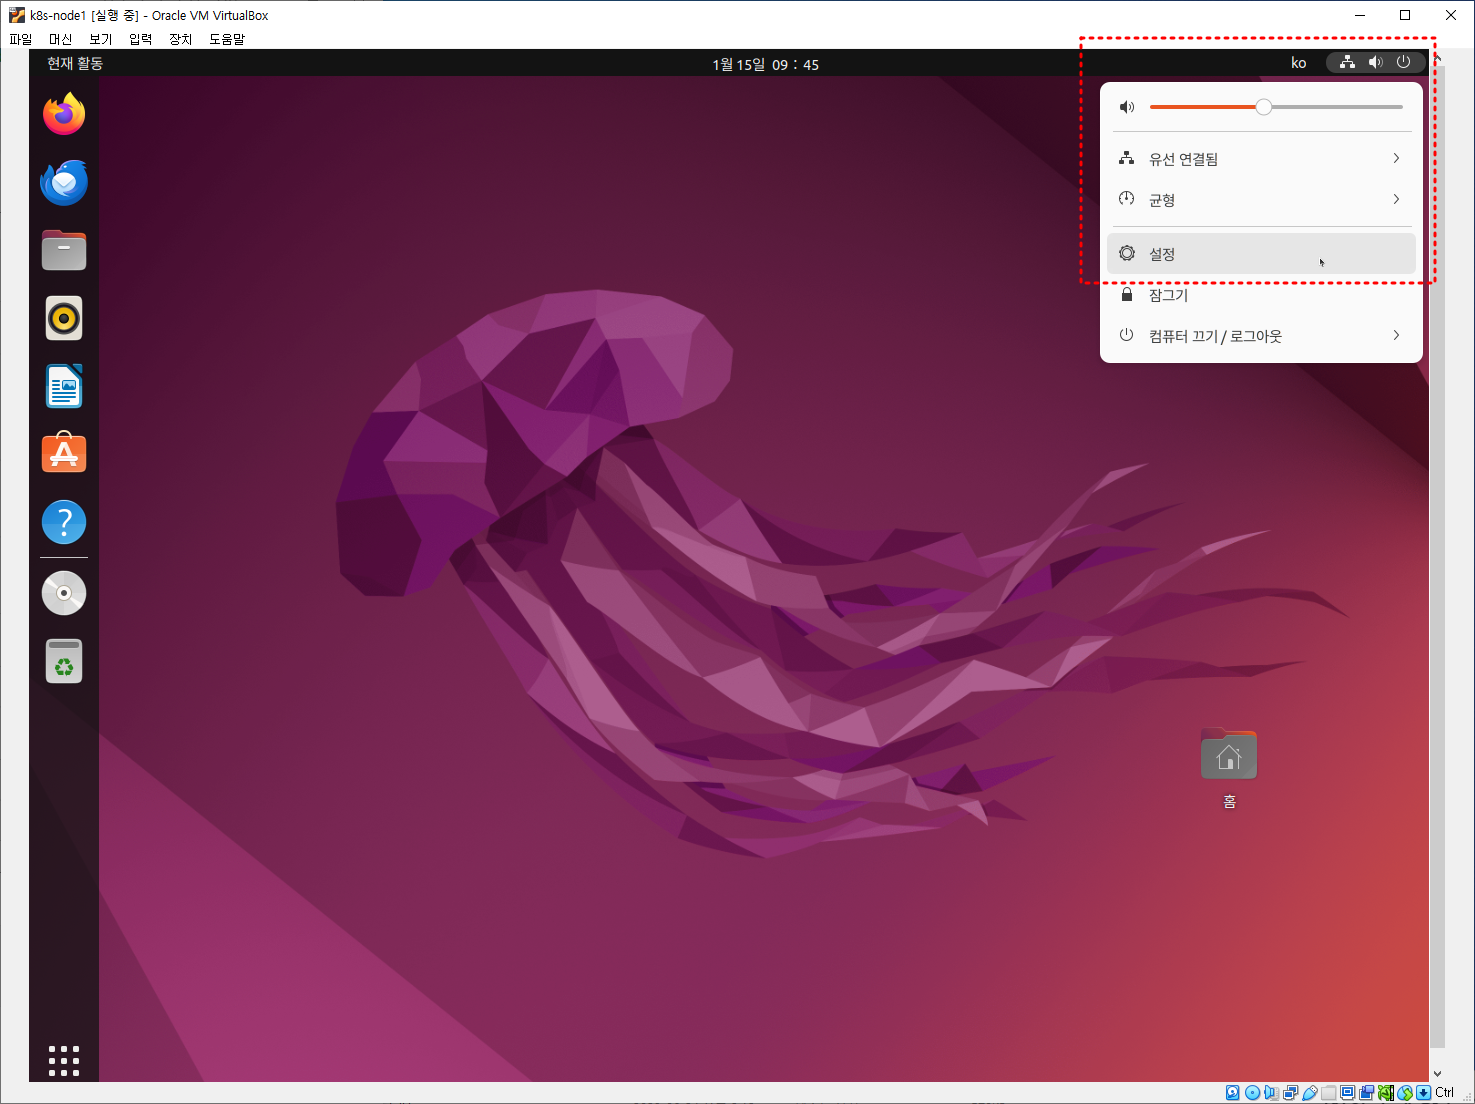
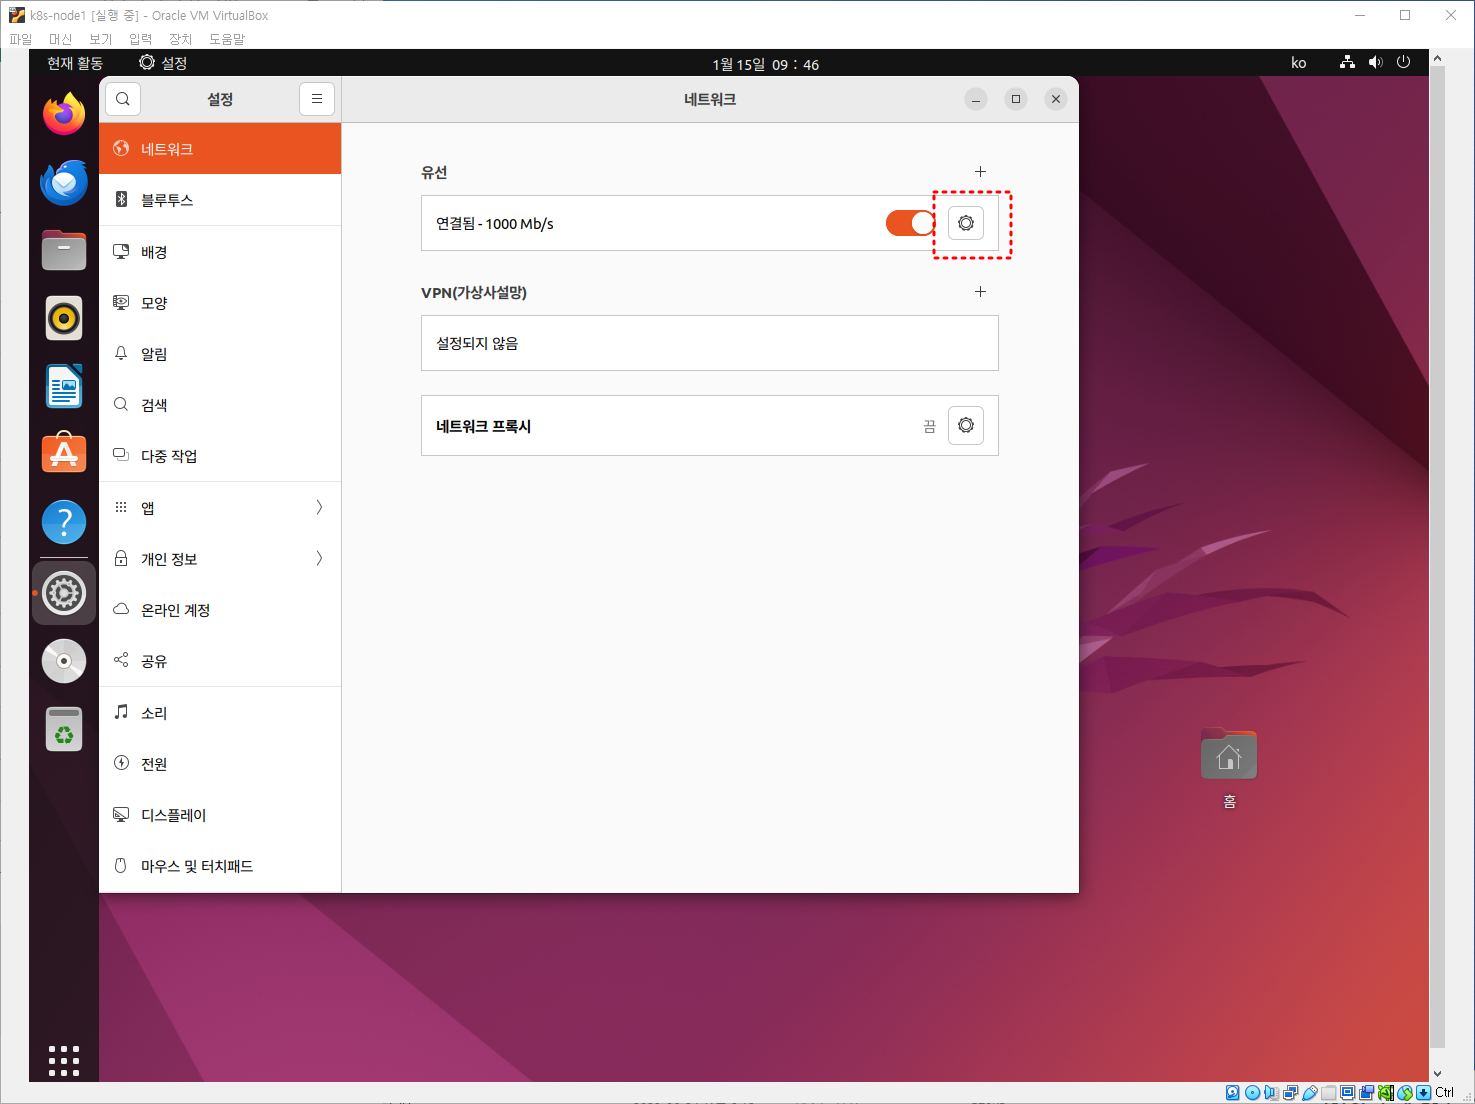
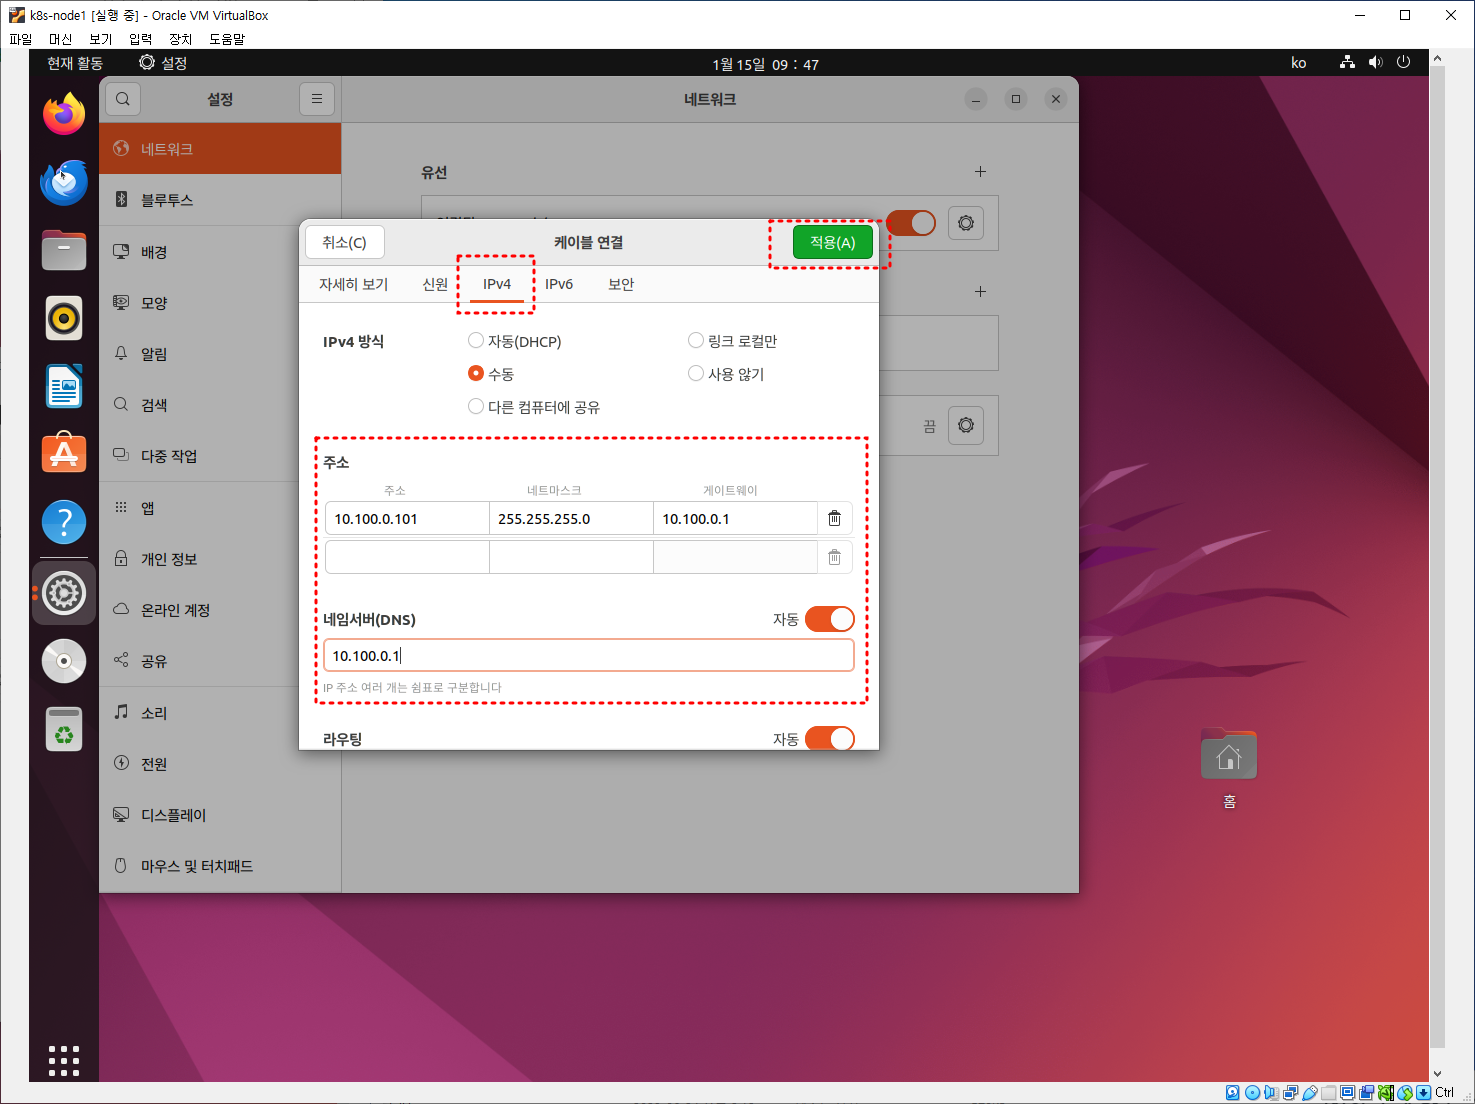
- 다시 확인
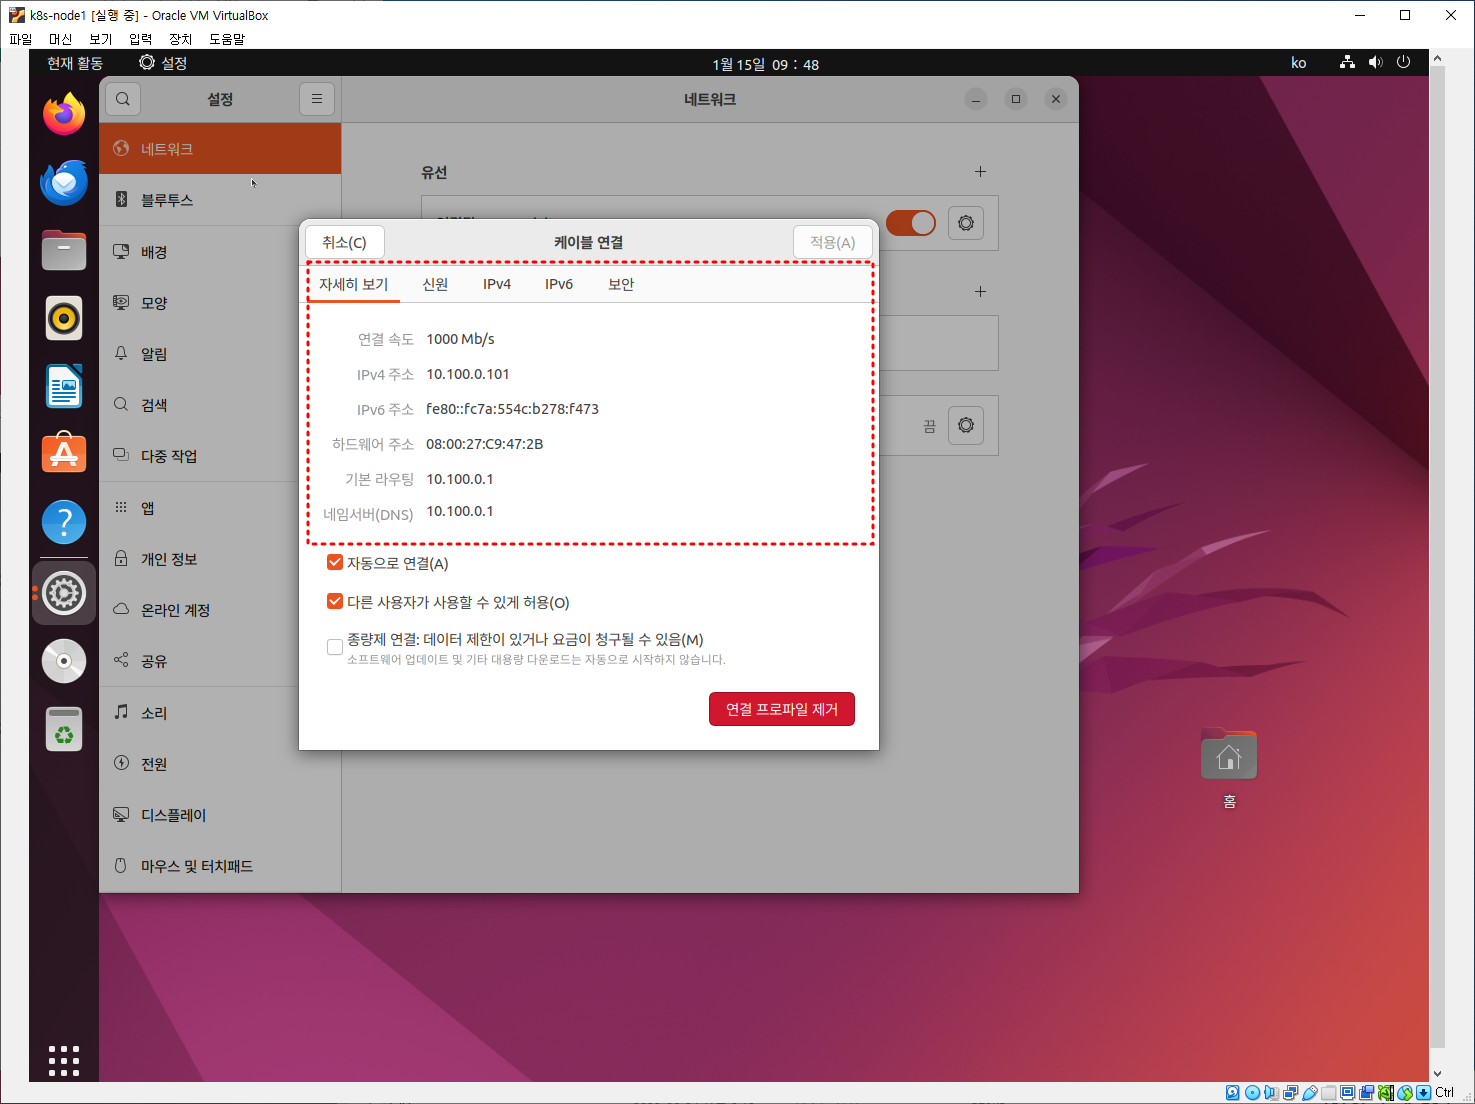

- 터미널에서 설정
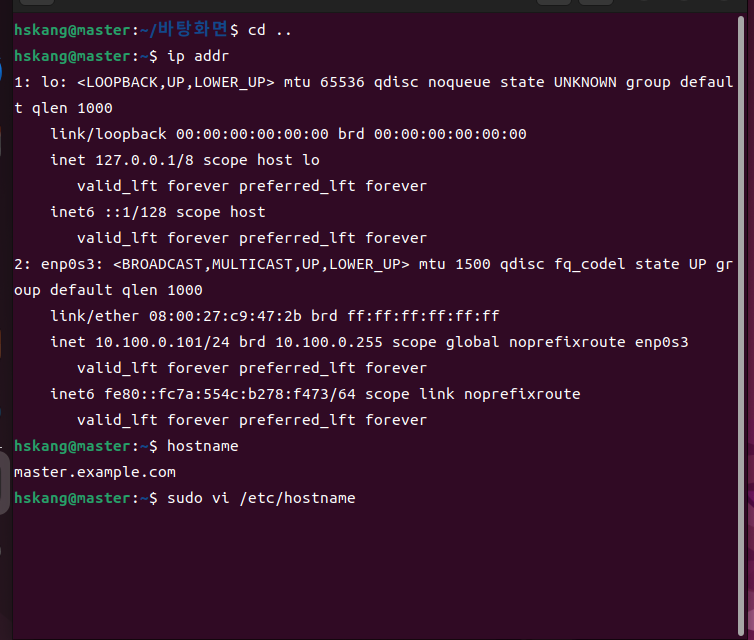
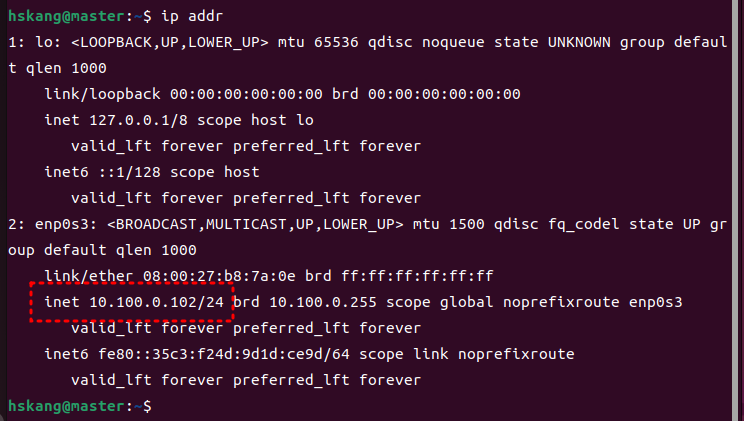
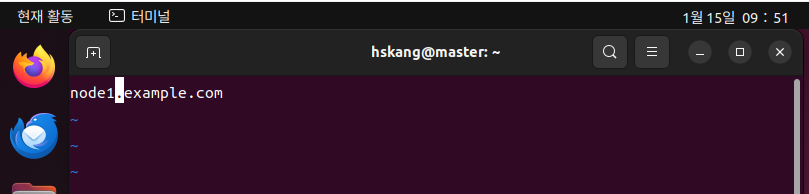
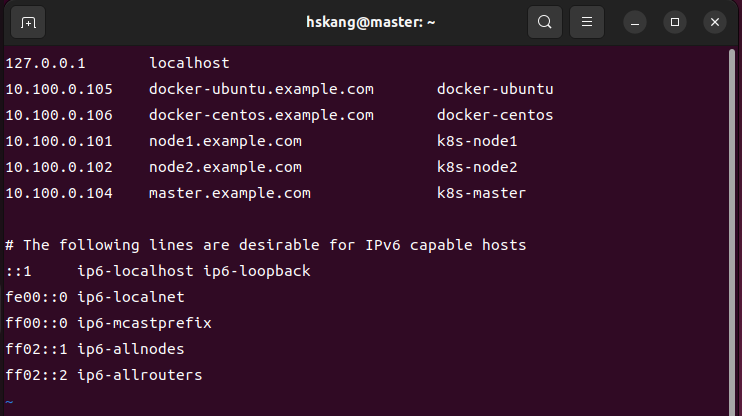
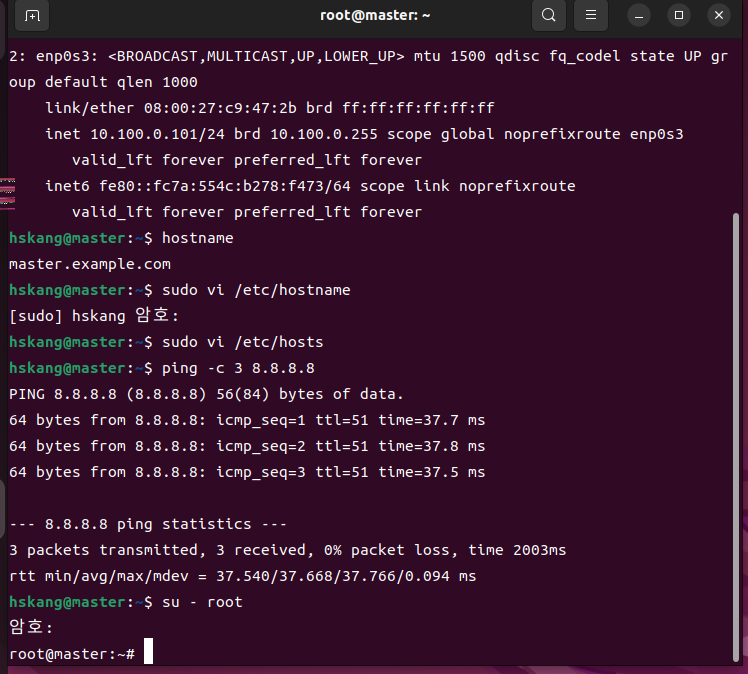

- 다음을 root 에서 수행
    - $# apt-get update # 복사 후에도 해야 함
    - $# apt-get install -y openssh-server curl vim tree # 이건 안해도 됨
    - $# systemctl status sshd # 확인 차원
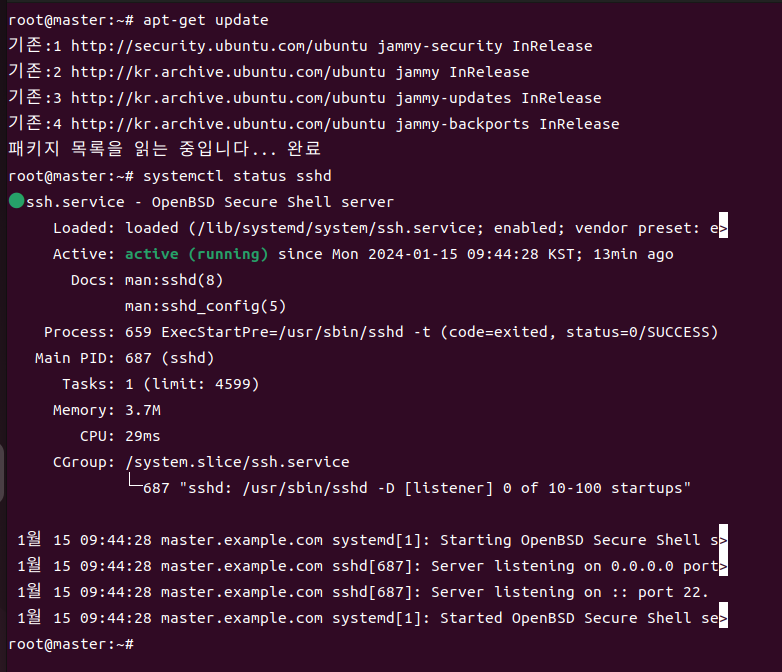

    - $# ssh hskang@localhost

yes 


암호입력

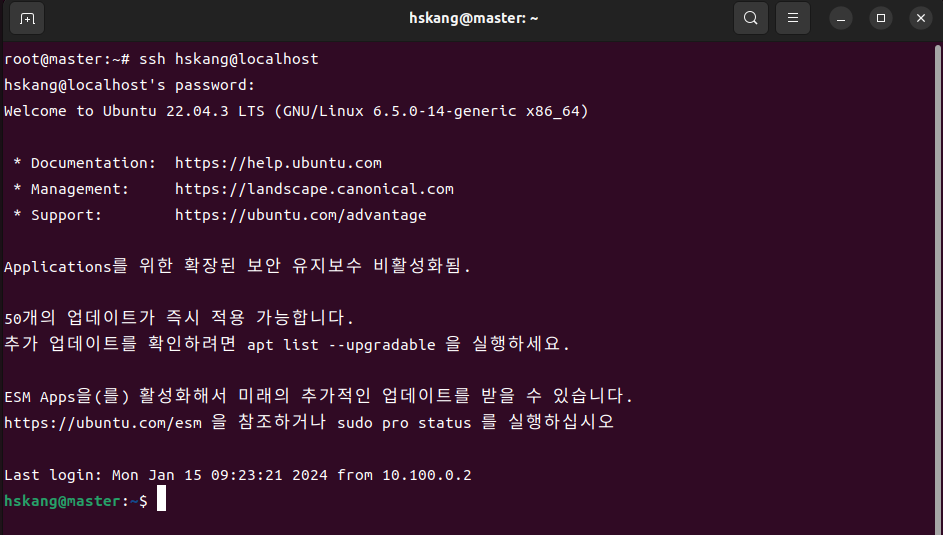

    - $ sudo reboot

- xshell 접속

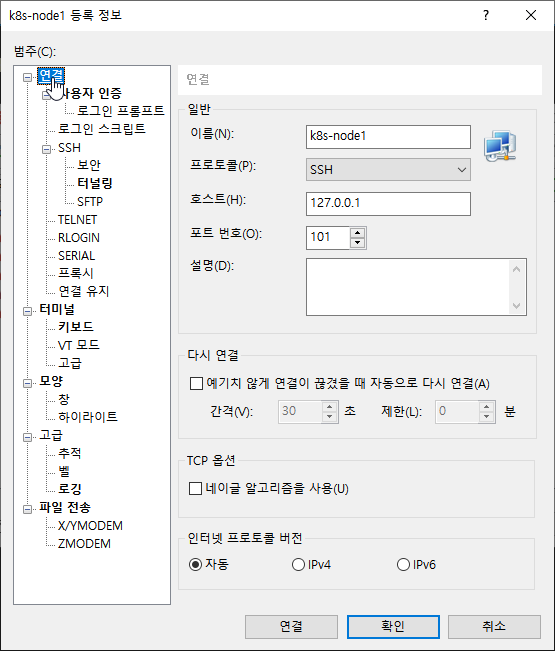
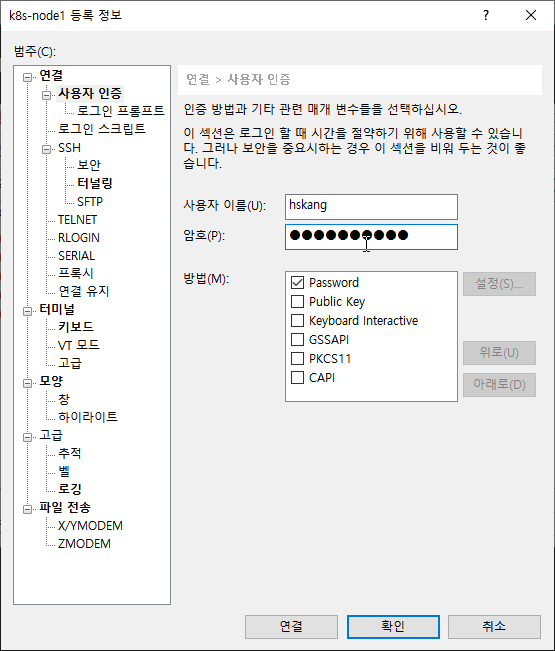

- 연결 성공

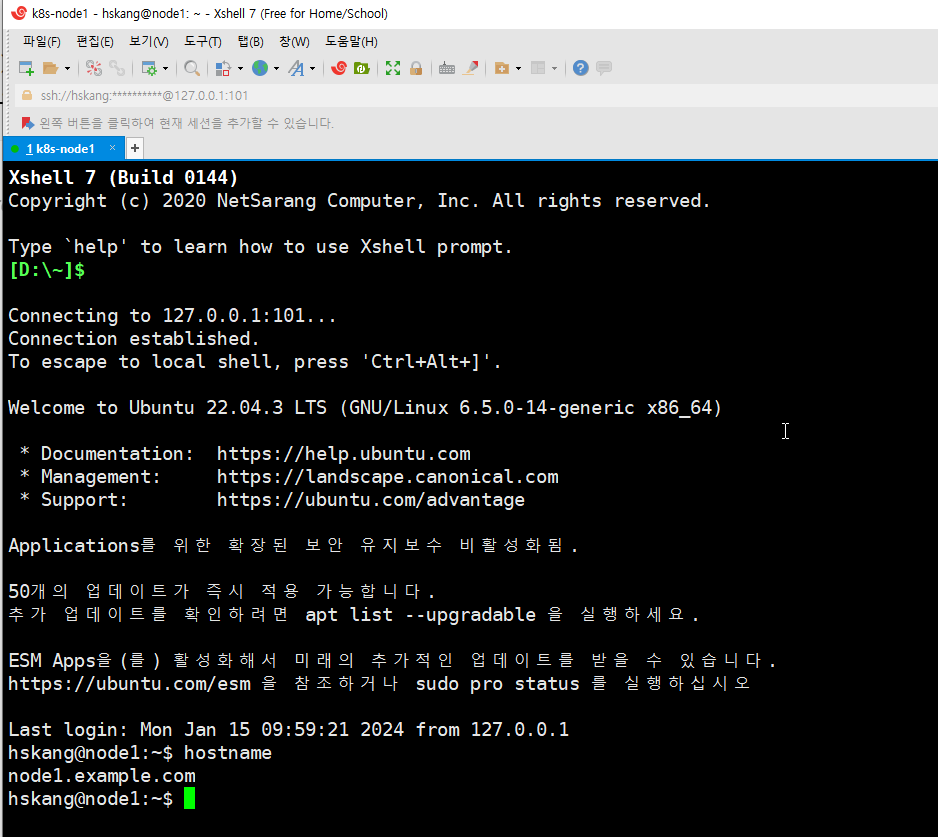

# 우분투에 도커 엔진 설치

[도커엔진설치](https://docs.docker.com/engine/install/ubuntu/)

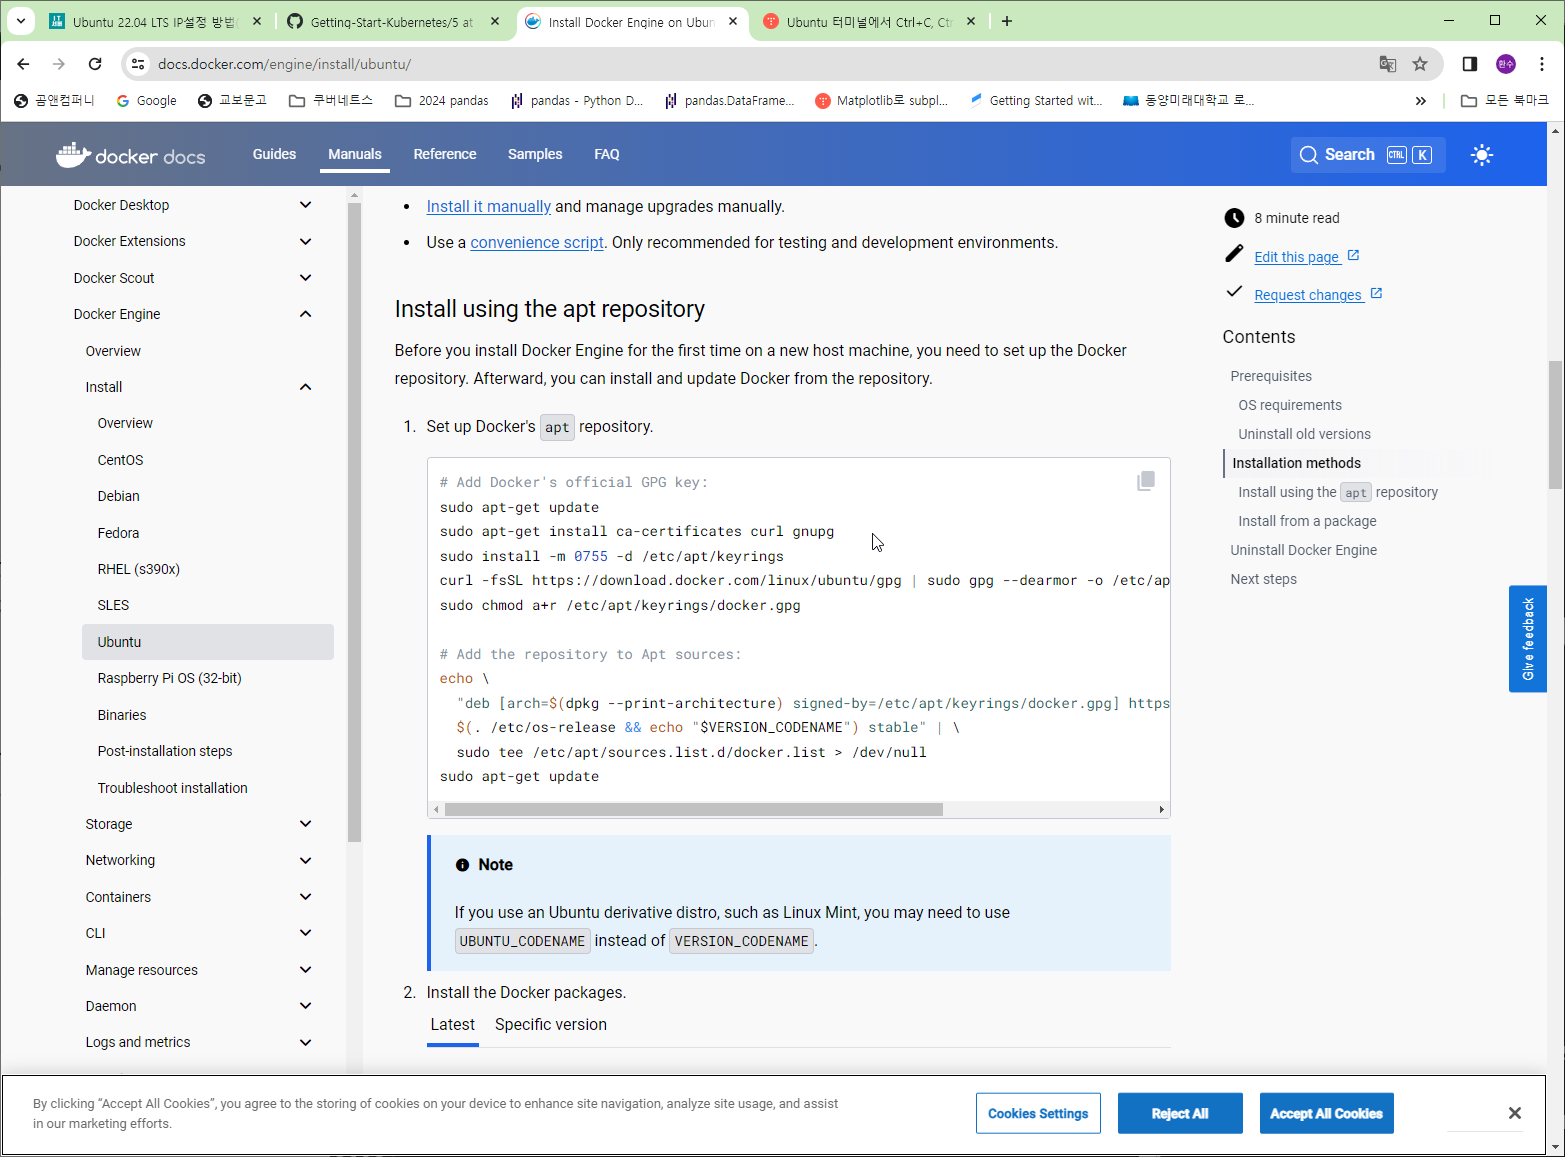

In [ ]:
$ sudo ls
암호 입력

# Add Docker's official GPG key:
sudo apt-get update
sudo apt-get install ca-certificates curl gnupg
sudo install -m 0755 -d /etc/apt/keyrings
curl -fsSL https://download.docker.com/linux/ubuntu/gpg | sudo gpg --dearmor -o /etc/apt/keyrings/docker.gpg
sudo chmod a+r /etc/apt/keyrings/docker.gpg

# Add the repository to Apt sources:
echo \
  "deb [arch=$(dpkg --print-architecture) signed-by=/etc/apt/keyrings/docker.gpg] https://download.docker.com/linux/ubuntu \
  $(. /etc/os-release && echo "$VERSION_CODENAME") stable" | \
  sudo tee /etc/apt/sources.list.d/docker.list > /dev/null
sudo apt-get update

sudo apt-get install -y docker-ce docker-ce-cli containerd.io docker-buildx-plugin docker-compose-plugin


sudo docker version

 sudo docker run hello-world

# 쿠버네티스 설치

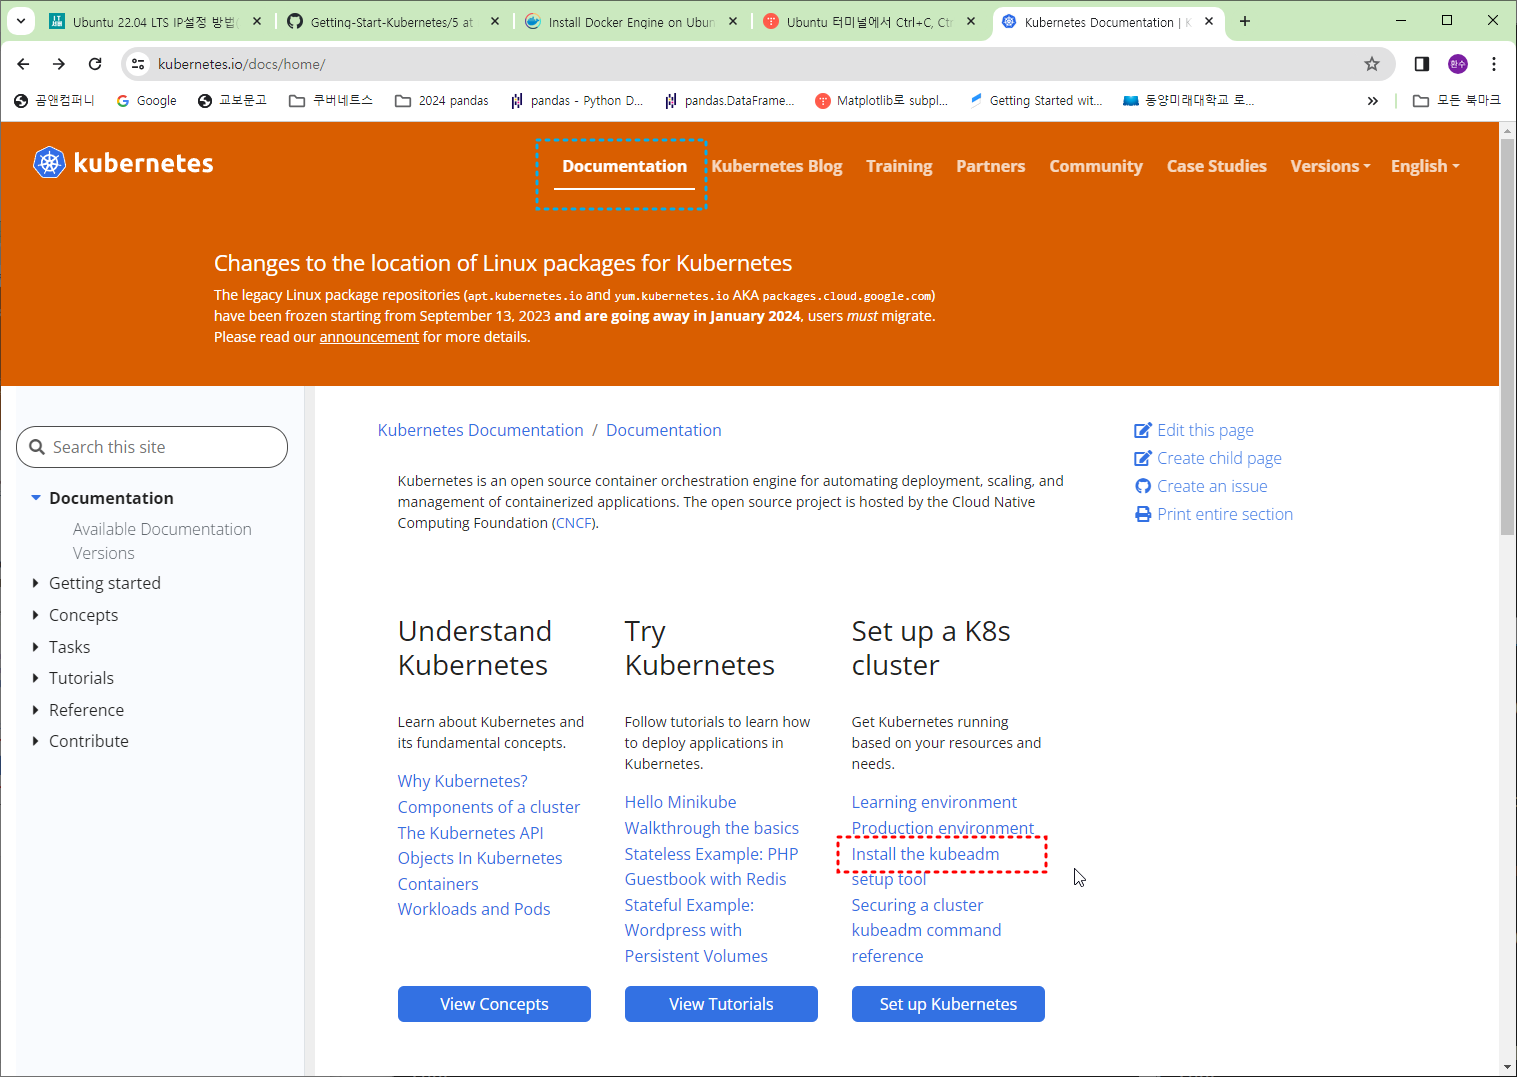
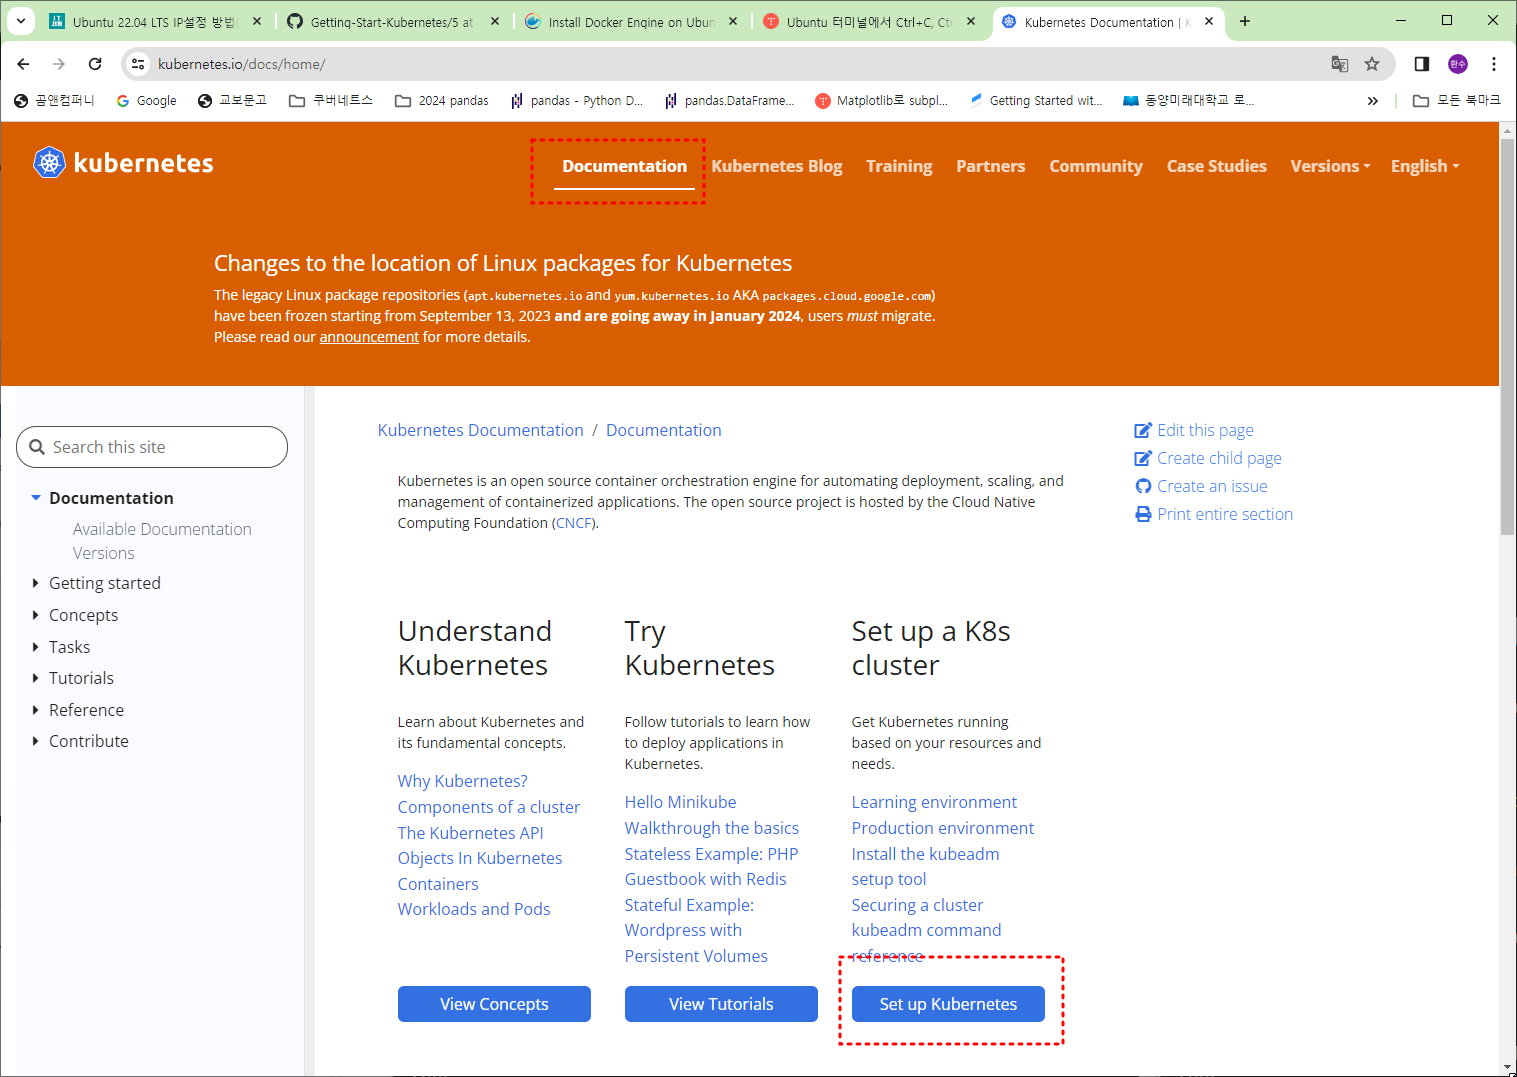

$ su -
암호

$ sudo swapoff -a

또는 

$ swapoff -a && sed -i '/swap/s/^/#/' /etc/fstab

$ nc 127.0.0.1 6443

apt-get update
apt-get install -y apt-transport-https ca-certificates curl gpg

curl -fsSL https://pkgs.k8s.io/core:/stable:/v1.29/deb/Release.key | gpg --dearmor -o /etc/apt/keyrings/kubernetes-apt-keyring.gpg

echo 'deb [signed-by=/etc/apt/keyrings/kubernetes-apt-keyring.gpg] https://pkgs.k8s.io/core:/stable:/v1.29/deb/ /' | tee /etc/apt/sources.list.d/kubernetes.list

sudo apt-get update
sudo apt-get install -y kubelet kubeadm kubectl
sudo apt-mark hold kubelet kubeadm kubectl

apt-get update
apt-get install -y kubelet kubeadm kubectl
apt-mark hold kubelet kubeadm kubectl

$ systemctl daemon-reload
$ systemctl restart kubelet

# worker 노드 설정

$ systemctl start kubelet
$ systemctl enable kubelet

# master, control-plane 설정

$ kubeadm init <args>

- 오류 발생

```
[init] Using Kubernetes version: v1.29.0
[preflight] Running pre-flight checks
error execution phase preflight: [preflight] Some fatal errors occurred:
	[ERROR CRI]: container runtime is not running: output: time="2024-01-15T12:20:27+09:00" level=fatal msg="validate service connection: validate CRI v1 runtime API for endpoint \"unix:///var/run/containerd/containerd.sock\": rpc error: code = Unimplemented desc = unknown service runtime.v1.RuntimeService"
, error: exit status 1
[preflight] If you know what you are doing, you can make a check non-fatal with `--ignore-preflight-errors=...`
To see the stack trace of this error execute with --v=5 or higher
```

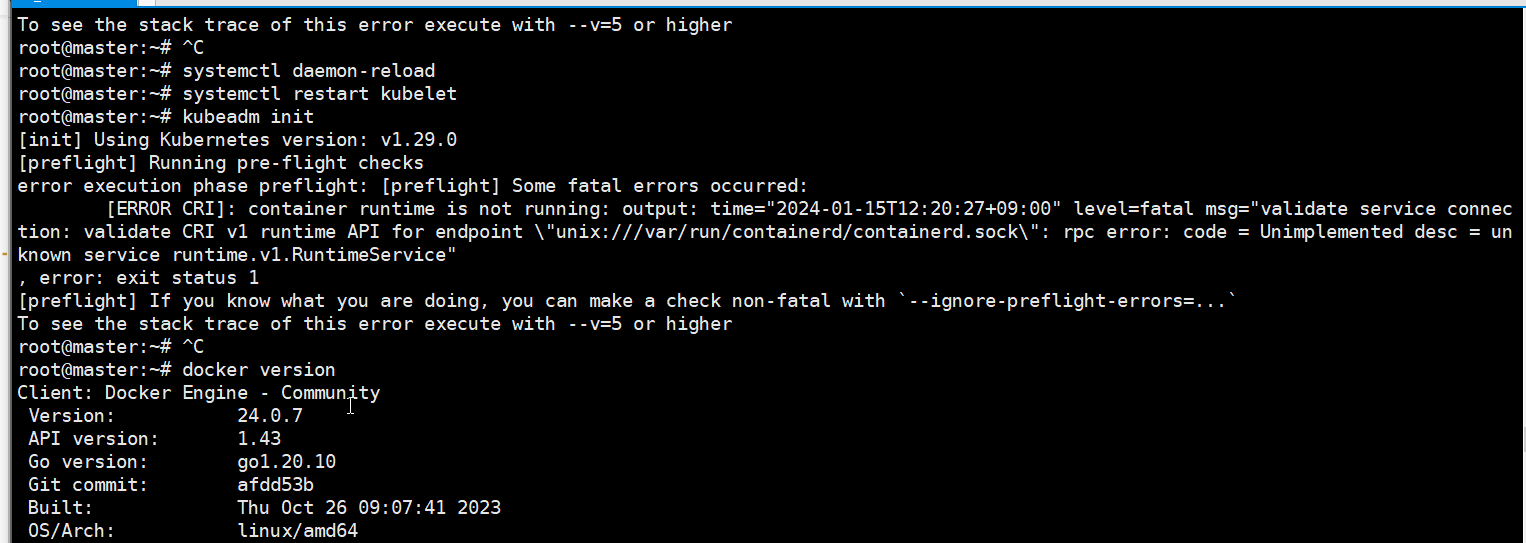

### 위에서 오류가 발생하면 다음으로 다시 실행
- [도움 사이트](https://musclebear.tistory.com/165)

```
$ rm /etc/containerd/config.toml
$ systemctl restart containerd
$ kubeadm init
```

In [ ]:
다음 내용 유용
```
To start using your cluster, you need to run the following as a regular user:

  mkdir -p $HOME/.kube
  sudo cp -i /etc/kubernetes/admin.conf $HOME/.kube/config
  sudo chown $(id -u):$(id -g) $HOME/.kube/config

Alternatively, if you are the root user, you can run:

  export KUBECONFIG=/etc/kubernetes/admin.conf

You should now deploy a pod network to the cluster.
Run "kubectl apply -f [podnetwork].yaml" with one of the options listed at:
  https://kubernetes.io/docs/concepts/cluster-administration/addons/

```

In [ ]:
저장한 토큰

In [ ]:
kubeadm join 10.100.0.104:6443 --token v4widp.3ftf29ve4muvc7p4 \
	--discovery-token-ca-cert-hash sha256:336c4a2c2845f0585c7de57034a6e49e7dde010891607e367c76371367200d19

다음을 점검
```
kubectl get nodes

웽서 오류나면 다음 실행
mkdir -p $HOME/.kube
sudo cp -i /etc/kubernetes/admin.conf $HOME/.kube/config
sudo chown $(id -u):$(id -g) $HOME/.kube/config

다시 실행
kubectl get nodes
```

kubectl get nodes 에서 다음 오류가 발생

The connection to the server 10.100.0.104:6443 was refused - did you specify the right host or port?